## Necessary imports

In [79]:
import matplotlib.pyplot as plt

from dojo.dimred import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

%matplotlib inline

## Loading data

In [80]:
iris = load_iris()
data = np.column_stack((iris["data"], iris["target"]))
np.random.shuffle(data)

X, y = data[:, :-1], data[:, -1]
y = LabelEncoder().fit_transform(y)

## Building the model

In [81]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_lda = lda.transform(X)

## Visualize

In [82]:
label_dict = {
    0: "setosa",
    1: "versicolor",
    2: "virginica"
}

/Users/victor/Documents/PyDojoML/.venv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


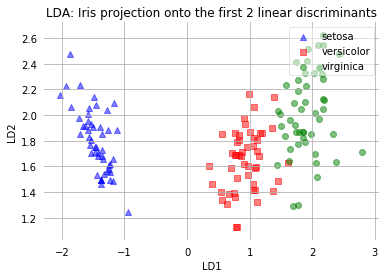

In [83]:
def plot_step_lda():

    ax = plt.subplot()
    for label,marker,color in zip(
        range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()